In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/btc_price_history.csv")

df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

df.head()

,date,price
0,2023-01-01,16547
1,2023-01-02,16688
2,2023-01-03,16832
3,2023-01-04,16941
4,2023-01-05,16807


In [4]:
df["daily_return"] = df["price"].pct_change()

df

,date,price,daily_return
0,2023-01-01,16547,NaN
1,2023-01-02,16688,0.008521
2,2023-01-03,16832,0.008629
3,2023-01-04,16941,0.006476
4,2023-01-05,16807,-0.007910
5,2023-01-06,16953,0.008687
6,2023-01-07,16934,-0.001121
7,2023-01-08,17144,0.012401
8,2023-01-09,17182,0.002217
9,2023-01-10,17431,0.014492


In [5]:
volatility = df["daily_return"].std()

volatility

np.float64(0.007000131894133234)

In [6]:
df["ma_3"] = df["price"].rolling(window=3).mean()
df["ma_5"] = df["price"].rolling(window=5).mean()

df

,date,price,daily_return,ma_3,ma_5
0,2023-01-01,16547,NaN,NaN,NaN
1,2023-01-02,16688,0.008521,NaN,NaN
2,2023-01-03,16832,0.008629,16689.000000,NaN
3,2023-01-04,16941,0.006476,16820.333333,NaN
4,2023-01-05,16807,-0.007910,16860.000000,16763.0
5,2023-01-06,16953,0.008687,16900.333333,16844.2
6,2023-01-07,16934,-0.001121,16898.000000,16893.4
7,2023-01-08,17144,0.012401,17010.333333,16955.8
8,2023-01-09,17182,0.002217,17086.666667,17004.0
9,2023-01-10,17431,0.014492,17252.333333,17128.8


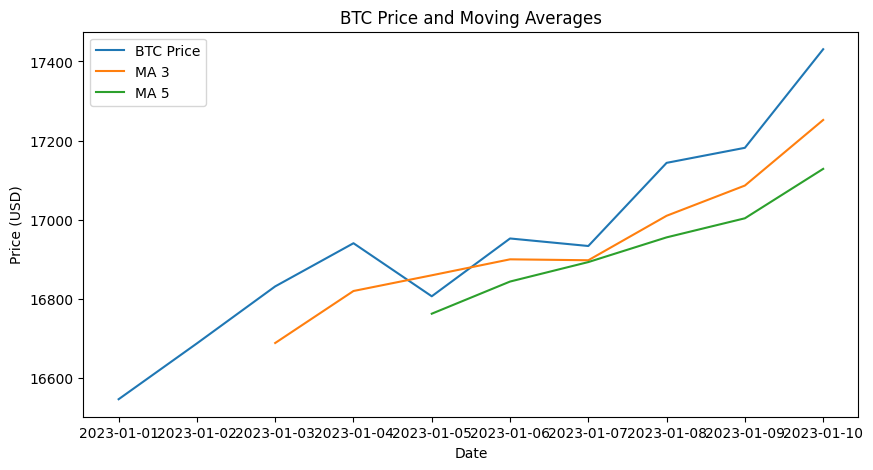

In [7]:
plt.figure(figsize=(10, 5))

plt.plot(df["date"], df["price"], label="BTC Price")
plt.plot(df["date"], df["ma_3"], label="MA 3")
plt.plot(df["date"], df["ma_5"], label="MA 5")

plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("BTC Price and Moving Averages")
plt.legend()
plt.show()

In [8]:
df["signal"] = 0
df.loc[df["ma_3"] > df["ma_5"], "signal"] = 1

df[["date", "price", "ma_3", "ma_5", "signal"]]

,date,price,ma_3,ma_5,signal
0,2023-01-01,16547,NaN,NaN,0
1,2023-01-02,16688,NaN,NaN,0
2,2023-01-03,16832,16689.000000,NaN,0
3,2023-01-04,16941,16820.333333,NaN,0
4,2023-01-05,16807,16860.000000,16763.0,1
5,2023-01-06,16953,16900.333333,16844.2,1
6,2023-01-07,16934,16898.000000,16893.4,1
7,2023-01-08,17144,17010.333333,16955.8,1
8,2023-01-09,17182,17086.666667,17004.0,1
9,2023-01-10,17431,17252.333333,17128.8,1


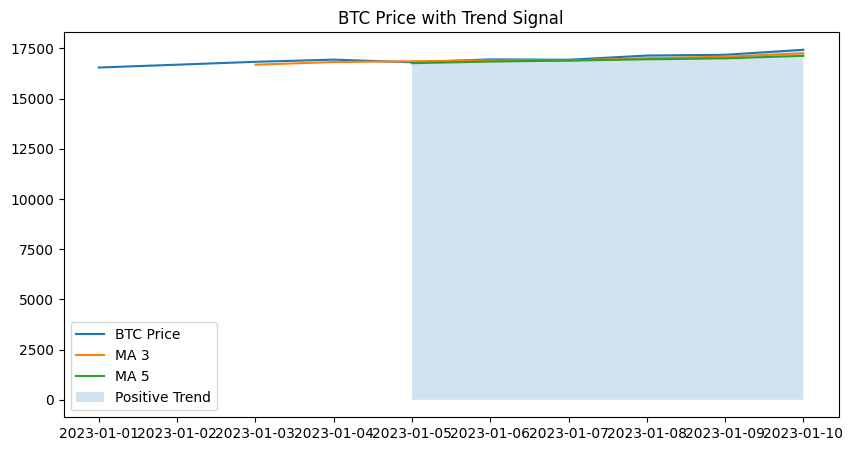

In [9]:
plt.figure(figsize=(10,5))

plt.plot(df["date"], df["price"], label="BTC Price")
plt.plot(df["date"], df["ma_3"], label="MA 3")
plt.plot(df["date"], df["ma_5"], label="MA 5")

plt.fill_between(
    df["date"],
    df["price"],
    where=df["signal"] == 1,
    alpha=0.2,
    label="Positive Trend"
)

plt.legend()
plt.title("BTC Price with Trend Signal")
plt.show()

In [10]:
daily_vol = df["daily_return"].std()

daily_vol

np.float64(0.007000131894133234)

In [11]:
import numpy as np

daily_vol = df["daily_return"].std()
days = 7
simulations = 10_000
range_limit = 0.05

random_returns = np.random.normal(0, daily_vol, size=(simulations, days))
cumulative_returns = random_returns.sum(axis=1)

exit_probability = np.mean(np.abs(cumulative_returns) > range_limit)

exit_probability

np.float64(0.0073)